In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import seaborn as sns
import platform

In [51]:
# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False


In [52]:
file_path = "./data/직업별_취업자_20220726153242.xlsx"
data = pd.read_excel(file_path)
data

c:\Users\admin\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,직업별,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,계,25299.0,25897.0,26178.0,26409.0,26725.0,26822.0,27123.0,26904.0,27273.0
1,"* 서비스·판매 종사자(4,5)",5719.0,5932.0,5942.0,6010.0,6037.0,6005.0,6146.0,5943.0,5839.0
2,4 서비스 종사자,2645.0,2779.0,2813.0,2888.0,2946.0,2969.0,3116.0,3046.0,3073.0
3,5 판매 종사자,3074.0,3154.0,3129.0,3121.0,3091.0,3037.0,3030.0,2897.0,2766.0
4,9 단순노무 종사자,3222.0,3299.0,3437.0,3440.0,3533.0,3483.0,3534.0,3718.0,3925.0


In [53]:
# 행/열 자리바꾸기
data = data.transpose()
data

,0,1,2,3,4
직업별,계,"* 서비스·판매 종사자(4,5)",4 서비스 종사자,5 판매 종사자,9 단순노무 종사자
2013,25299.0,5719.0,2645.0,3074.0,3222.0
2014,25897.0,5932.0,2779.0,3154.0,3299.0
2015,26178.0,5942.0,2813.0,3129.0,3437.0
2016,26409.0,6010.0,2888.0,3121.0,3440.0
2017,26725.0,6037.0,2946.0,3091.0,3533.0
2018,26822.0,6005.0,2969.0,3037.0,3483.0
2019,27123.0,6146.0,3116.0,3030.0,3534.0
2020,26904.0,5943.0,3046.0,2897.0,3718.0
2021,27273.0,5839.0,3073.0,2766.0,3925.0


In [54]:
data = data.iloc[1:,:]
data



,0,1,2,3,4
2013,25299.0,5719.0,2645.0,3074.0,3222.0
2014,25897.0,5932.0,2779.0,3154.0,3299.0
2015,26178.0,5942.0,2813.0,3129.0,3437.0
2016,26409.0,6010.0,2888.0,3121.0,3440.0
2017,26725.0,6037.0,2946.0,3091.0,3533.0
2018,26822.0,6005.0,2969.0,3037.0,3483.0
2019,27123.0,6146.0,3116.0,3030.0,3534.0
2020,26904.0,5943.0,3046.0,2897.0,3718.0
2021,27273.0,5839.0,3073.0,2766.0,3925.0


In [55]:
data = data.reset_index()
data

,index,0,1,2,3,4
0,2013,25299.0,5719.0,2645.0,3074.0,3222.0
1,2014,25897.0,5932.0,2779.0,3154.0,3299.0
2,2015,26178.0,5942.0,2813.0,3129.0,3437.0
3,2016,26409.0,6010.0,2888.0,3121.0,3440.0
4,2017,26725.0,6037.0,2946.0,3091.0,3533.0
5,2018,26822.0,6005.0,2969.0,3037.0,3483.0
6,2019,27123.0,6146.0,3116.0,3030.0,3534.0
7,2020,26904.0,5943.0,3046.0,2897.0,3718.0
8,2021,27273.0,5839.0,3073.0,2766.0,3925.0


In [56]:
file_path = "./data/고용노동부_연도별 최저임금_20210805.csv"
data_min = pd.read_csv(file_path,encoding = 'euc-kr')
data_min

,연도,시간급
0,2022,9160
1,2021,8720
2,2020,8590
3,2019,8350
4,2018,7530
5,2017,6470
6,2016,6030
7,2015,5580
8,2014,5210
9,2013,4860


In [57]:
data_min = data_min.iloc[1:,:]
data_min = data_min.reset_index(drop= "True")

In [58]:
data_min.columns = ["연도별","최저시급"]
data_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   연도별     9 non-null      int64
 1   최저시급    9 non-null      int64
dtypes: int64(2)
memory usage: 272.0 bytes


In [59]:
data.columns = ["연도별", "계", "서비스·판매 종사자", "서비스 종사자", "판매 종사자", "단순노무 종사자"]
data = data.astype("int64")

In [60]:
data = pd.merge(data,data_min,how="inner",on="연도별")

In [61]:
data = data.set_index("연도별")
data

,계,서비스·판매 종사자,서비스 종사자,판매 종사자,단순노무 종사자,최저시급
연도별,,,,,,
2013,25299,5719,2645,3074,3222,4860
2014,25897,5932,2779,3154,3299,5210
2015,26178,5942,2813,3129,3437,5580
2016,26409,6010,2888,3121,3440,6030
2017,26725,6037,2946,3091,3533,6470
2018,26822,6005,2969,3037,3483,7530
2019,27123,6146,3116,3030,3534,8350
2020,26904,5943,3046,2897,3718,8590
2021,27273,5839,3073,2766,3925,8720


In [62]:
data[["계","최저시급"]]

,계,최저시급
연도별,,
2013,25299,4860
2014,25897,5210
2015,26178,5580
2016,26409,6030
2017,26725,6470
2018,26822,7530
2019,27123,8350
2020,26904,8590
2021,27273,8720


In [63]:
data.corr(method='pearson')

,계,서비스·판매 종사자,서비스 종사자,판매 종사자,단순노무 종사자,최저시급
계,1.000000,0.575696,0.982200,-0.642622,0.859857,0.922718
서비스·판매 종사자,0.575696,1.000000,0.604817,0.229589,0.118907,0.359290
서비스 종사자,0.982200,0.604817,1.000000,-0.636223,0.821605,0.948572
판매 종사자,-0.642622,0.229589,-0.636223,1.000000,-0.889394,-0.810925
단순노무 종사자,0.859857,0.118907,0.821605,-0.889394,1.000000,0.869335
최저시급,0.922718,0.359290,0.948572,-0.810925,0.869335,1.000000


In [64]:
data_1 = data[["계", "서비스·판매 종사자", "최저시급"]]

In [65]:
xrange =range(len(data_1))
data_total = data_1.loc[:,['계']]
data_ser = data_1.loc[:,['서비스·판매 종사자']]



In [66]:
data_total = data_total.reset_index()
data_total

,연도별,계
0,2013,25299
1,2014,25897
2,2015,26178
3,2016,26409
4,2017,26725
5,2018,26822
6,2019,27123
7,2020,26904
8,2021,27273


In [67]:
data_ser = data_ser.reset_index()
data_ser

,연도별,서비스·판매 종사자
0,2013,5719
1,2014,5932
2,2015,5942
3,2016,6010
4,2017,6037
5,2018,6005
6,2019,6146
7,2020,5943
8,2021,5839


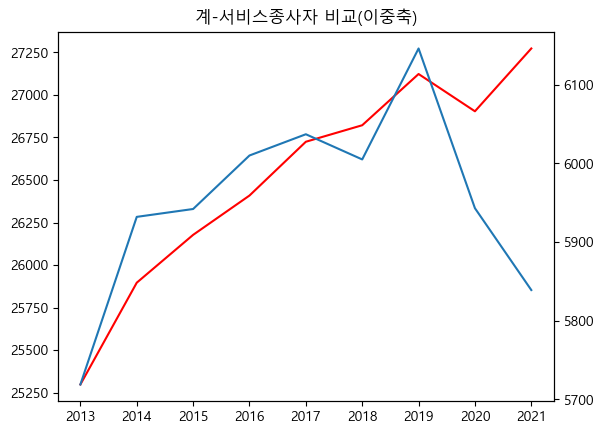

In [68]:

fig, ax1 = plt.subplots()
ax1.set_title('계-서비스종사자 비교(이중축)')
ax1.plot(data_total['연도별'],data_total["계"], color = "red")
ax2 = ax1.twinx()
ax2.plot(data_ser['연도별'],data_ser["서비스·판매 종사자"])
plt.show()

# color = 'tab:red'
# ax1.set_ylabel('계',color = color)
# ax1.plot(xrange, data_total, color = color)
# ax1.tick_params(axis='y',labelcolor = color)

# ax2 = ax1.twinx()

# color = 'tab:blue'
# ax2.set_ylabel('서비스종사자',color = color)
# ax2.plot(xrange, data_ser, color = color)
# ax2.tick_params(axis='y',labelcolor = color)

# fig.tight_layout()


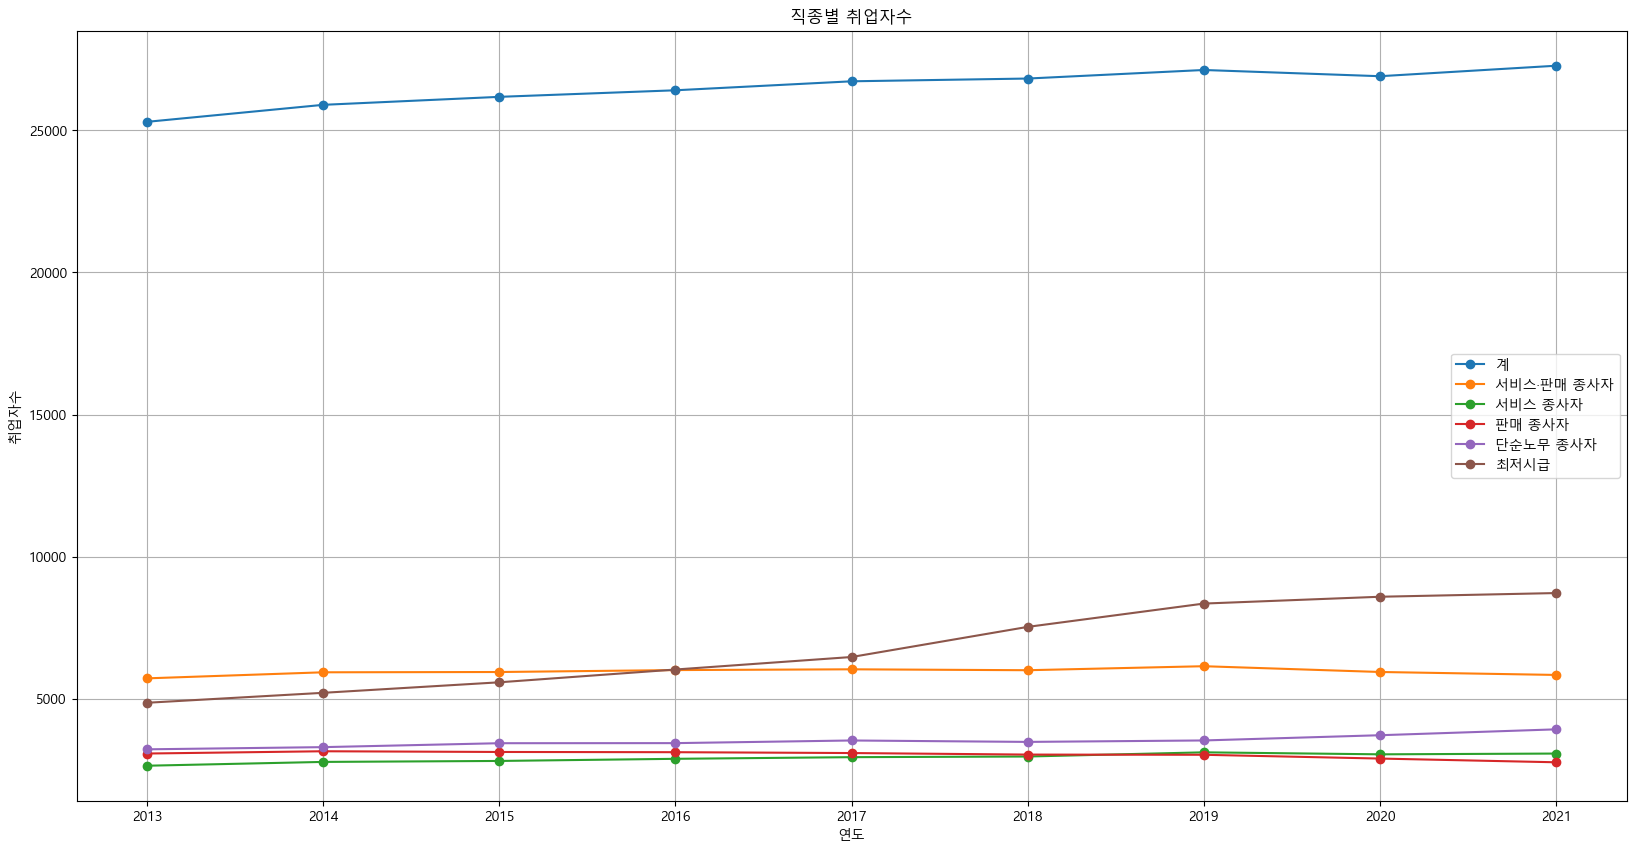

In [69]:
data.plot(title = 'SomeTitle', figsize=(20,10), legend = True, marker = 'o', rot=0)

plt.grid(True)

plt.xlabel('연도')
plt.ylabel('취업자수')
plt.title('직종별 취업자수')

plt.show()


